# Starting guide

En esta clase nos basaremos en la starting guide de lenstronomy creada por Simon Birrer y disponible en:

https://github.com/sibirrer/lenstronomy_extensions/blob/master/lenstronomy_extensions/Notebooks/starting_guide.ipynb

Los objetivos de esta clase son:

1. Conocer los parametros basicos necesarios para iniciar el modulo LensModel
2. Conocer los modelos y parametros para cada uno, disponibles en lenstronomy
3. Resolver la ecuacion de la lente y calcular la magnificacion 
4. Usar el modulo Plot asociado a lenstronomy para ilustrar curvas criticas y causticas.
5. Entender los modelos SIS y SIE.

In [1]:
# some standard python imports #
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

## Modulo LensModel 

LensModel es un subpaquete que ejecuta todas las tareas puramente relacionadas con lensing. Esto incluye:

1. ray-shooting
2. Resolver la ecuacion de la lente
3. Calculo del tiempo de llegada 
4. Solucionadores no lineales para optimizar modelos de lentes para configuraciones de imagen específicas.

El modulo permite usar uno o multiples planos lentes y agregar superposiciones arbitrarias de modelos lente.

Revisar documentacion para mas opciones

https://lenstronomy.readthedocs.io/en/latest/lenstronomy.LensModel.html

https://lenstronomy.readthedocs.io/en/latest/_modules/index.html

## Singular Isothermal Sphere

Vamos a inicializar un modelo con un solo plano lente y una SIS y ejecutar rutinas basicas:

https://lenstronomy.readthedocs.io/en/latest/_modules/lenstronomy/LensModel/Profiles/sis.html

In [9]:
#importamos la clase LensModel
from lenstronomy.LensModel.lens_model import LensModel

# especificamos el modelo
lens_model_list = ['SIS'] #

# setup lens model class with the list of lens models
lensModel = LensModel(lens_model_list=lens_model_list) 
kwargs_sis = {'theta_E': 1.0, 'center_x': 0.0, 'center_y': 0.0} #theta_E en arcsec
kwargs_lens = [kwargs_sis]

# Coordenadas de la una de las imagenes de la fuente en el plano lente
theta_ra, theta_dec = .8, .4

# Coordenadas de la fuente en el plano fuente #
beta_ra, beta_dec = lensModel.ray_shooting(theta_ra, theta_dec, kwargs_lens)
print(f'coordenadas plano fuente: {beta_ra:.3} {beta_dec:.3}')


coordenadas plano fuente: -0.0944 -0.0472


### lens equation solver

Resolviendo la ecuacion de la lente se puede calcular la posicion de las imagenes dada la posicion de la fuente.

Para revisar las opciones ir a https://lenstronomy.readthedocs.io/en/latest/_modules/lenstronomy/LensModel/Solver/lens_equation_solver.html

In [10]:
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver

# specifiy the lens model class to deal with #
solver = LensEquationSolver(lensModel)

# solve for image positions provided a lens model and the source position #
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens)

print(f' posicion de las images: ra = {theta_ra} dec = {theta_dec}')

 posicion de las images: ra = [-0.98885438  0.8       ] dec = [-0.49442719  0.4       ]


**Ahora que conocemos la posicion de las imagenes podemos calcular algunos valores usando el modulo lensModel**

Todas las opciones se pueden encontrar en https://lenstronomy.readthedocs.io/en/latest/_modules/lenstronomy/LensModel/lens_model.html

In [11]:
# the magnification of the point source images #
mag = lensModel.magnification(theta_ra, theta_dec, kwargs_lens)

#Magnificacion
kappa = lensModel.kappa(theta_ra, theta_dec, kwargs_lens)

#Magnificacion
gamma = lensModel.gamma(theta_ra, theta_dec, kwargs_lens)

print(f'magnificacion {mag}')
print('kappa:',kappa)
print(f'gamma: {gamma}')

magnificacion [10.47213595 -8.47213595]
kappa: [0.45225425 0.55901699]
gamma: (array([-0.27135255, -0.3354102 ]), array([-0.3618034, -0.4472136]))


### Grafica usando lens_plot

- Grafica la convergencia y las curvas criticas y causticas.
- Las curvas criticas y causticas son las que requieren mas tiempo de computo.
- La estrella es la posicion de la fuente en el plano fuente.
- los diamantes la posicion de las imagenes.

/home/karina/miniconda3/envs/LENS/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


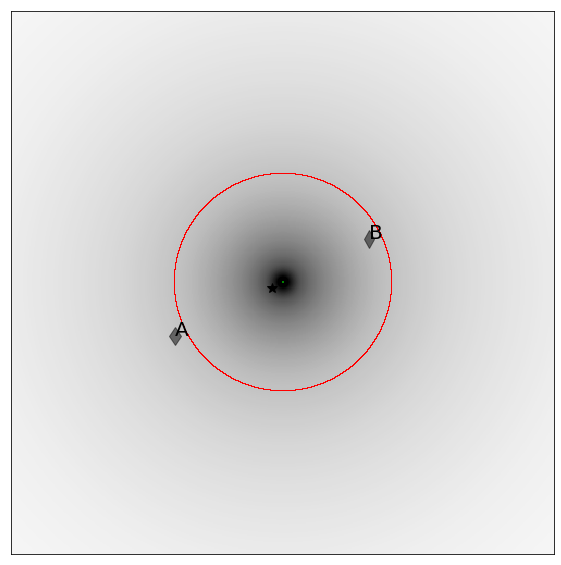

In [12]:
from lenstronomy.Plots import lens_plot
#%matplotlib qt 
f, axex = plt.subplots(1, 1, figsize=(10, 10), sharex=False, sharey=False)
lens_plot.lens_model_plot(axex, lensModel=lensModel, kwargs_lens=kwargs_lens, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True)
f.show()